In [1]:
import geopandas as gpd

In [2]:
# shapefile = gpd.read_file("../data/MetraStations/MetraStations.shp")

metra_df = gpd.read_file("../data/MetraStations")
bus_df = gpd.read_file("../data/CTA_BusStops")

In [3]:
# convert to lat-long
metra_df = metra_df.to_crs(epsg=4326)
# metra_df.plot()
metra_df

,OBJECTID,STATION_ID,ASSET_ID,NAME,LONGNAME,LINES,BRANCH_ID,STATUS,MILEPOST,FAREZONE,...,TICKET_AVA,ADDRESS,MUNICIPALI,TELEPHONE,WEBLINK,LABELANGLE,EDIT_INIT,EDIT_DATE,YEAR_OPEN,geometry
0,1,1091.0,51201091.0,Stony Island,Stony Island,Electric,1,1,9.1,B,...,None,71st St. (at Stony Island Ave.),Chicago,None,None,30,ks,1995-08-02,None,MULTIPOINT (-87.58685 41.76601)
1,2,1097.0,51201097.0,Bryn Mawr,Bryn Mawr,Electric,1,1,9.7,B,...,None,71st St. (at Jeffrey Blvd.),Chicago,None,None,30,ks,1995-08-02,None,MULTIPOINT (-87.57700 41.76612)
2,3,1103.0,51201103.0,South Shore,South Shore,Electric,1,1,10.3,B,...,None,71st St. (near Yates and South Shore Dr.),Chicago,None,None,0,ks,1995-08-02,None,MULTIPOINT (-87.56571 41.76524)
3,4,1109.0,51201109.0,Windsor Park,Windsor Park,Electric,1,1,10.9,B,...,None,75th St. (at Exchange Ave.),Chicago,None,None,0,ks,1995-08-02,None,MULTIPOINT (-87.55963 41.75851)
4,5,1115.0,51201115.0,Cheltenham,Cheltenham (79th Street),Electric,1,1,11.5,B,...,None,79th St. (at Exchange Ave.),Chicago,None,None,0,ks,1995-08-02,None,MULTIPOINT (-87.55285 41.75232)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,243,0.0,0.0,Schiller Park,Schiller Park,NCS,16,1,0.0,C,...,None,4555 Ruby St,Schiller Park,None,None,0,af,2011-04-28,None,MULTIPOINT (-87.86900 41.96306)
243,244,0.0,0.0,Belmont Ave,Belmont Ave,NCS,16,1,0.0,C,...,None,9280 Belmont Ave,Franklin Park,None,None,0,af,2011-04-28,None,MULTIPOINT (-87.86029 41.93856)
244,245,0.0,0.0,Grand-Cicero,Grand-Cicero,Milw-W,12,1,0.0,B,...,None,1833 N Cicero Ave,Chicago,None,None,0,af,2011-04-28,None,MULTIPOINT (-87.74653 41.91444)
245,246,0.0,0.0,Laraway Road,New Lenox Laraway Road,SWS,8,1,0.0,H,...,None,1861 Village Station Blvd,New Lenox,None,None,0,af,2011-04-28,None,MULTIPOINT (-87.95990 41.48316)


In [4]:
# metra_df = metra_df.explode()
def get_first_point(multipoint):
    return list(multipoint.geoms)[0] if multipoint else None
    
# Apply the function to create a new column with only the first point
metra_df['geometry'] = metra_df['geometry'].apply(lambda mp: get_first_point(mp))


In [5]:
metra_df

,OBJECTID,STATION_ID,ASSET_ID,NAME,LONGNAME,LINES,BRANCH_ID,STATUS,MILEPOST,FAREZONE,...,TICKET_AVA,ADDRESS,MUNICIPALI,TELEPHONE,WEBLINK,LABELANGLE,EDIT_INIT,EDIT_DATE,YEAR_OPEN,geometry
0,1,1091.0,51201091.0,Stony Island,Stony Island,Electric,1,1,9.1,B,...,None,71st St. (at Stony Island Ave.),Chicago,None,None,30,ks,1995-08-02,None,POINT (-87.58685 41.76601)
1,2,1097.0,51201097.0,Bryn Mawr,Bryn Mawr,Electric,1,1,9.7,B,...,None,71st St. (at Jeffrey Blvd.),Chicago,None,None,30,ks,1995-08-02,None,POINT (-87.57700 41.76612)
2,3,1103.0,51201103.0,South Shore,South Shore,Electric,1,1,10.3,B,...,None,71st St. (near Yates and South Shore Dr.),Chicago,None,None,0,ks,1995-08-02,None,POINT (-87.56571 41.76524)
3,4,1109.0,51201109.0,Windsor Park,Windsor Park,Electric,1,1,10.9,B,...,None,75th St. (at Exchange Ave.),Chicago,None,None,0,ks,1995-08-02,None,POINT (-87.55963 41.75851)
4,5,1115.0,51201115.0,Cheltenham,Cheltenham (79th Street),Electric,1,1,11.5,B,...,None,79th St. (at Exchange Ave.),Chicago,None,None,0,ks,1995-08-02,None,POINT (-87.55285 41.75232)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,243,0.0,0.0,Schiller Park,Schiller Park,NCS,16,1,0.0,C,...,None,4555 Ruby St,Schiller Park,None,None,0,af,2011-04-28,None,POINT (-87.86900 41.96306)
243,244,0.0,0.0,Belmont Ave,Belmont Ave,NCS,16,1,0.0,C,...,None,9280 Belmont Ave,Franklin Park,None,None,0,af,2011-04-28,None,POINT (-87.86029 41.93856)
244,245,0.0,0.0,Grand-Cicero,Grand-Cicero,Milw-W,12,1,0.0,B,...,None,1833 N Cicero Ave,Chicago,None,None,0,af,2011-04-28,None,POINT (-87.74653 41.91444)
245,246,0.0,0.0,Laraway Road,New Lenox Laraway Road,SWS,8,1,0.0,H,...,None,1861 Village Station Blvd,New Lenox,None,None,0,af,2011-04-28,None,POINT (-87.95990 41.48316)


<AxesSubplot: >

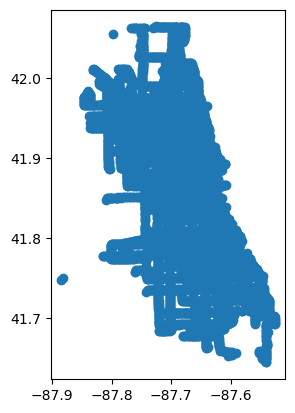

In [6]:
bus_df = bus_df.to_crs(epsg=4326)
bus_df.plot()

In [7]:
import math
import numpy as np
from geopy import distance

def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)

def find_closest_metra(df, x, y):
    coords = df['geometry'].get_coordinates()

    # find min distance station
    idx = np.argmin(np.sqrt(np.square(coords['x'].values - x) + np.square(coords['y'].values - y)))
    print("SHAPE", np.sqrt(np.square(coords['x'].values - x) + np.square(coords['y'].values - y)).shape)
    print(idx)
    return coords['x'][idx], coords['y'][idx], df['NAME'][idx] 

def find_distance_to_closest_metra(df, x, y):
    metra_x, metra_y, name = find_closest_metra(df, x, y)

    return distance.distance((x, y), (metra_x, metra_y)).mi

# print(find_distance_to_closest_metra(bus_df, -87.721, 41.632))


SHAPE (247,)
202
1.6195267054064848


In [11]:

metra_routes = gpd.read_file("../data/MetraLines").to_crs(epsg=4326)
metra_routes

,ASSET_ID,LINES,DESCRIPTIO,EDIT_INIT,EDIT_DATE,geometry
0,21200078.0,Electric,18th St. (2.2) to 19th St. Merge,hm,1995-08-02,"LINESTRING (-87.61803 41.85773, -87.61754 41.8..."
1,21200075.0,"Electric, S. Shore",19th St. Merge (no junction) to McCormick Plac...,hm,1995-08-02,"LINESTRING (-87.61733 41.85658, -87.61723 41.8..."
2,21200001.0,"Electric, S. Shore",11th Pl. Divide to 19th St. Merge,aef,2001-03-08,"LINESTRING (-87.61957 41.86375, -87.61924 41.8..."
3,21200212.0,"UP-N, UP-NW, UP-W",Ogilvie Station to Clinton St. Junction,hm,1995-08-02,"LINESTRING (-87.64214 41.88963, -87.64195 41.8..."
4,21200211.0,"Milw-N, Milw-W, NCS",Union Station (North) to Western Ave. Interloc...,aef,2001-11-05,"LINESTRING (-87.68604 41.88844, -87.68553 41.8..."
...,...,...,...,...,...,...
255,21200284.0,BNSF,Route 59 (31.6) to Aurora (37.5),ml,2001-02-13,"LINESTRING (-88.20852 41.77813, -88.21362 41.7..."
256,21200234.0,"Electric, S. Shore",Randolph St. to Van Buren St. (0.8),aef,2001-03-08,"LINESTRING (-87.62309 41.88437, -87.62281 41.8..."
257,21200235.0,"Electric, S. Shore",Van Buren St. (0.8) to Roosevelt Rd. (1.4),aef,2001-03-08,"LINESTRING (-87.62281 41.87700, -87.62274 41.8..."
258,21200079.0,"Electric, S. Shore",Roosevelt Rd. (1.4) to 11th Pl. Divide,hm,1995-08-02,"LINESTRING (-87.62142 41.86839, -87.62117 41.8..."


In [ ]:
for record in metra_routes:
    record['DESCRIPTIO']

In [12]:
metra_df


,OBJECTID,STATION_ID,ASSET_ID,NAME,LONGNAME,LINES,BRANCH_ID,STATUS,MILEPOST,FAREZONE,...,TICKET_AVA,ADDRESS,MUNICIPALI,TELEPHONE,WEBLINK,LABELANGLE,EDIT_INIT,EDIT_DATE,YEAR_OPEN,geometry
0,1,1091.0,51201091.0,Stony Island,Stony Island,Electric,1,1,9.1,B,...,None,71st St. (at Stony Island Ave.),Chicago,None,None,30,ks,1995-08-02,None,POINT (-87.58685 41.76601)
1,2,1097.0,51201097.0,Bryn Mawr,Bryn Mawr,Electric,1,1,9.7,B,...,None,71st St. (at Jeffrey Blvd.),Chicago,None,None,30,ks,1995-08-02,None,POINT (-87.57700 41.76612)
2,3,1103.0,51201103.0,South Shore,South Shore,Electric,1,1,10.3,B,...,None,71st St. (near Yates and South Shore Dr.),Chicago,None,None,0,ks,1995-08-02,None,POINT (-87.56571 41.76524)
3,4,1109.0,51201109.0,Windsor Park,Windsor Park,Electric,1,1,10.9,B,...,None,75th St. (at Exchange Ave.),Chicago,None,None,0,ks,1995-08-02,None,POINT (-87.55963 41.75851)
4,5,1115.0,51201115.0,Cheltenham,Cheltenham (79th Street),Electric,1,1,11.5,B,...,None,79th St. (at Exchange Ave.),Chicago,None,None,0,ks,1995-08-02,None,POINT (-87.55285 41.75232)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,243,0.0,0.0,Schiller Park,Schiller Park,NCS,16,1,0.0,C,...,None,4555 Ruby St,Schiller Park,None,None,0,af,2011-04-28,None,POINT (-87.86900 41.96306)
243,244,0.0,0.0,Belmont Ave,Belmont Ave,NCS,16,1,0.0,C,...,None,9280 Belmont Ave,Franklin Park,None,None,0,af,2011-04-28,None,POINT (-87.86029 41.93856)
244,245,0.0,0.0,Grand-Cicero,Grand-Cicero,Milw-W,12,1,0.0,B,...,None,1833 N Cicero Ave,Chicago,None,None,0,af,2011-04-28,None,POINT (-87.74653 41.91444)
245,246,0.0,0.0,Laraway Road,New Lenox Laraway Road,SWS,8,1,0.0,H,...,None,1861 Village Station Blvd,New Lenox,None,None,0,af,2011-04-28,None,POINT (-87.95990 41.48316)


<AxesSubplot: >

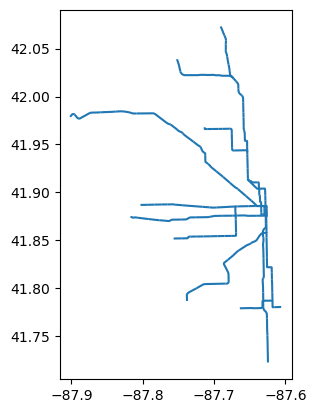

In [14]:
rail_lines = gpd.read_file("../data/CTA_RailLines/").to_crs(epsg=4326)
rail_lines.plot()

In [15]:

metra_routes = gpd.read_file("../data/MetraLines").to_crs(epsg=4326)

metra_routes

,ASSET_ID,LINES,DESCRIPTIO,EDIT_INIT,EDIT_DATE,geometry
0,21200078.0,Electric,18th St. (2.2) to 19th St. Merge,hm,1995-08-02,"LINESTRING (-87.61803 41.85773, -87.61754 41.8..."
1,21200075.0,"Electric, S. Shore",19th St. Merge (no junction) to McCormick Plac...,hm,1995-08-02,"LINESTRING (-87.61733 41.85658, -87.61723 41.8..."
2,21200001.0,"Electric, S. Shore",11th Pl. Divide to 19th St. Merge,aef,2001-03-08,"LINESTRING (-87.61957 41.86375, -87.61924 41.8..."
3,21200212.0,"UP-N, UP-NW, UP-W",Ogilvie Station to Clinton St. Junction,hm,1995-08-02,"LINESTRING (-87.64214 41.88963, -87.64195 41.8..."
4,21200211.0,"Milw-N, Milw-W, NCS",Union Station (North) to Western Ave. Interloc...,aef,2001-11-05,"LINESTRING (-87.68604 41.88844, -87.68553 41.8..."
...,...,...,...,...,...,...
255,21200284.0,BNSF,Route 59 (31.6) to Aurora (37.5),ml,2001-02-13,"LINESTRING (-88.20852 41.77813, -88.21362 41.7..."
256,21200234.0,"Electric, S. Shore",Randolph St. to Van Buren St. (0.8),aef,2001-03-08,"LINESTRING (-87.62309 41.88437, -87.62281 41.8..."
257,21200235.0,"Electric, S. Shore",Van Buren St. (0.8) to Roosevelt Rd. (1.4),aef,2001-03-08,"LINESTRING (-87.62281 41.87700, -87.62274 41.8..."
258,21200079.0,"Electric, S. Shore",Roosevelt Rd. (1.4) to 11th Pl. Divide,hm,1995-08-02,"LINESTRING (-87.62142 41.86839, -87.62117 41.8..."
